## Random Forest Model — Classification de la densité urbaine


 Mini-projet : 3

Ce notebook présente l’implémentation du modèle Random Forest pour la classification de la densité urbaine.
Il inclut l’analyse des performances (accuracy, classification report), la matrice de confusion (heatmap), l’étude de l’importance des variables ainsi qu’une validation croisée pour évaluer la robustesse du modèle.

##  Importation de toutes les bibliothèques nécessaires

In [1]:
print(" Importations et démarrage du programme Random Forest")

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    precision_score, recall_score, f1_score
) 


 Importations et démarrage du programme Random Forest


##  Chargement du dataset


In [ ]:
df = pd.read_csv("../data/geo_urban_density_data_preprocessed.csv")
print("Dimensions du dataset :", df.shape)
df.head()


Dimensions du dataset : (1411, 11)


,densite_population,densite_batiments,hauteur_moy_bat,distance_centre_km,taux_impermeabilisation,longitude,latitude,classe_urbaine,wifi_density_probe,classe_urbaine_encoded,target
0,0.453399,-0.698912,2.843182,-1.272241,-0.430125,-6.051183,34.894106,moyenne,-1.901630,1,1
1,-0.211900,0.245391,-0.813133,-0.649780,1.170118,-6.081844,34.830155,moyenne,0.001375,1,1
2,0.611582,0.682685,0.561947,-1.026238,0.140410,-6.132758,35.022266,moyenne,0.001375,1,1
3,1.528722,1.333833,0.145990,1.440636,-1.334519,-6.009676,35.016155,faible,0.001375,0,0
4,-0.312351,0.937712,0.371744,0.629681,0.189653,-5.934113,35.099108,faible,0.001375,0,0


##  Séparation Train / Test


In [4]:
X = df.drop(columns=["classe_urbaine"])
y = df["classe_urbaine"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

os.makedirs("figures", exist_ok=True)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)


Train size: (1128, 10)
Test size: (283, 10)


## Le modèle Random Forest de base


In [5]:
rf_base = RandomForestClassifier(random_state=42)
rf_base.fit(X_train, y_train)

y_pred_base = rf_base.predict(X_test)

acc_base = accuracy_score(y_test, y_pred_base)
prec_base = precision_score(y_test, y_pred_base, average='weighted', zero_division=0)
rec_base = recall_score(y_test, y_pred_base, average='weighted', zero_division=0)
f1_base = f1_score(y_test, y_pred_base, average='weighted', zero_division=0)

print("Accuracy :", acc_base)
print("Precision:", prec_base)
print("Recall   :", rec_base)
print("F1-score :", f1_base)

print("\nRapport de classification :")
print(classification_report(y_test, y_pred_base, zero_division=0))



Accuracy : 0.9929328621908127
Precision: 0.9864310954063605
Recall   : 0.9929328621908127
F1-score : 0.9895465253239105

Rapport de classification :
                   precision    recall  f1-score   support

           elevee       1.00      1.00      1.00         3
           faible       1.00      1.00      1.00       165
       industriel       0.00      0.00      0.00         2
          moyenne       1.00      1.00      1.00        90
zone_industrielle       0.92      1.00      0.96        23

         accuracy                           0.99       283
        macro avg       0.78      0.80      0.79       283
     weighted avg       0.99      0.99      0.99       283



## Matrice de confusion de base 


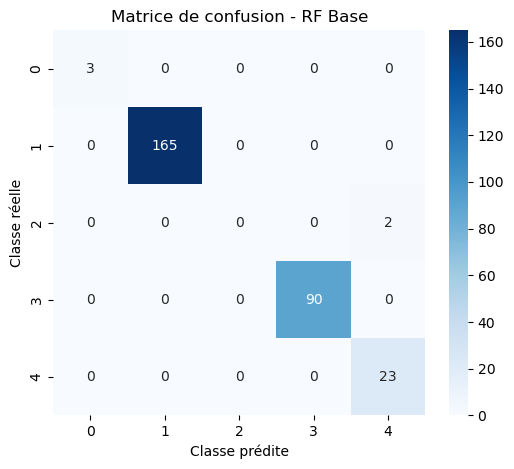

In [6]:
cm_base = confusion_matrix(y_test, y_pred_base)

plt.figure(figsize=(6,5))
sns.heatmap(cm_base, annot=True, fmt="d", cmap="Blues")
plt.title("Matrice de confusion - RF Base")
plt.xlabel("Classe prédite")
plt.ylabel("Classe réelle")
plt.savefig("figures/confusion_matrix_rf_base.png")
plt.show()

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

rf_opt = RandomForestClassifier(
    n_estimators=300,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)

rf_opt.fit(X_train, y_train)
y_pred_opt = rf_opt.predict(X_test)

acc_opt = accuracy_score(y_test, y_pred_opt)
prec_opt = precision_score(y_test, y_pred_opt, average='weighted', zero_division=0)
rec_opt = recall_score(y_test, y_pred_opt, average='weighted', zero_division=0)
f1_opt = f1_score(y_test, y_pred_opt, average='weighted', zero_division=0)

print("Accuracy :", acc_opt)
print("Precision:", prec_opt)
print("Recall   :", rec_opt)
print("F1-score :", f1_opt)

print("\nRapport de classification :")
print(classification_report(y_test, y_pred_opt, zero_division=0))


Accuracy : 0.9929328621908127
Precision: 0.9864310954063605
Recall   : 0.9929328621908127
F1-score : 0.9895465253239105

Rapport de classification :
                   precision    recall  f1-score   support

           elevee       1.00      1.00      1.00         3
           faible       1.00      1.00      1.00       165
       industriel       0.00      0.00      0.00         2
          moyenne       1.00      1.00      1.00        90
zone_industrielle       0.92      1.00      0.96        23

         accuracy                           0.99       283
        macro avg       0.78      0.80      0.79       283
     weighted avg       0.99      0.99      0.99       283



## Le modèle optimisé

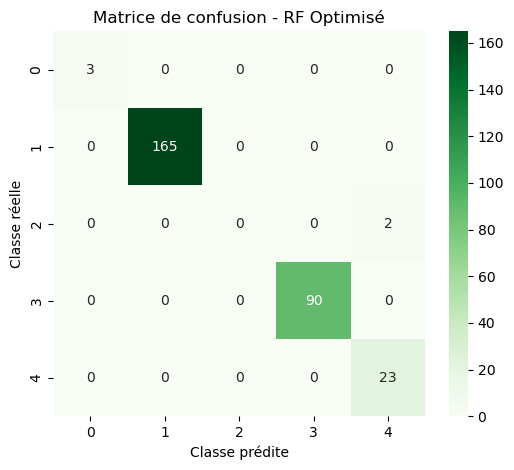

In [8]:
cm_opt = confusion_matrix(y_test, y_pred_opt)

plt.figure(figsize=(6,5))
sns.heatmap(cm_opt, annot=True, fmt="d", cmap="Greens")
plt.title("Matrice de confusion - RF Optimisé")
plt.xlabel("Classe prédite")
plt.ylabel("Classe réelle")
plt.savefig("figures/confusion_matrix_rf_optimise.png")
plt.show()


##  Validation Croisée


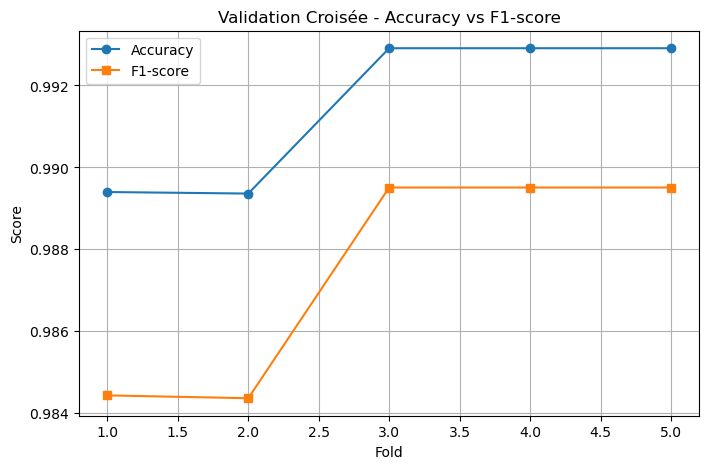

Accuracy CV moyenne : 0.9914968799338396
F1-score CV moyen   : 0.9874667689043891


In [9]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

acc_scores = cross_val_score(rf_opt, X, y, cv=cv, scoring="accuracy")
f1_scores = cross_val_score(rf_opt, X, y, cv=cv, scoring="f1_weighted")

plt.figure(figsize=(8,5))
plt.plot(range(1,6), acc_scores, marker='o', label="Accuracy")
plt.plot(range(1,6), f1_scores, marker='s', label="F1-score")
plt.title("Validation Croisée - Accuracy vs F1-score")
plt.xlabel("Fold")
plt.ylabel("Score")
plt.legend()
plt.grid(True)
plt.savefig("figures/cv_accuracy_f1.png")
plt.show()

print("Accuracy CV moyenne :", np.mean(acc_scores))
print("F1-score CV moyen   :", np.mean(f1_scores))


## 📈 Importance des Variables


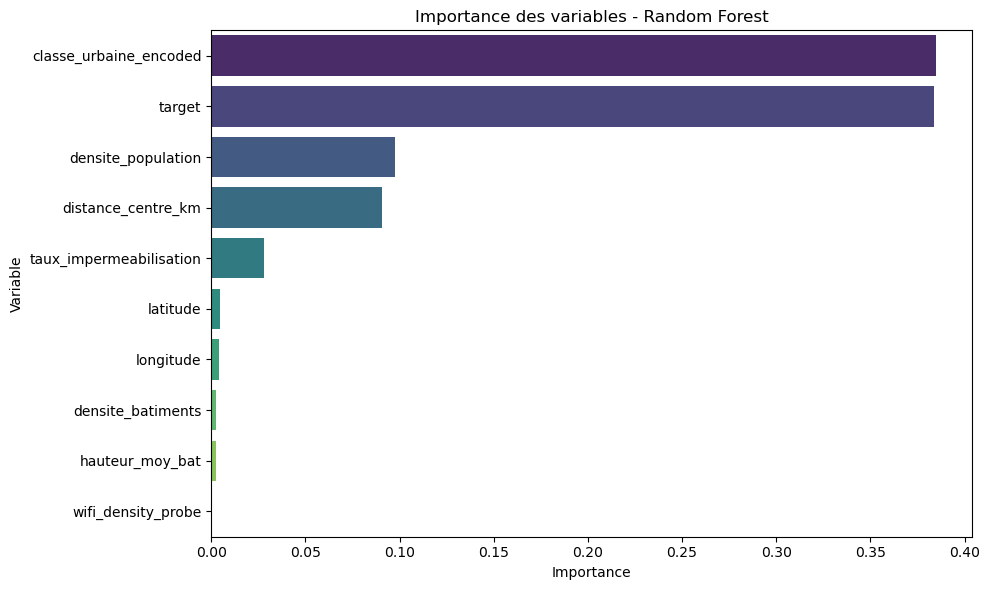

Variables les plus importantes :
                  Variable  Importance
8   classe_urbaine_encoded    0.384647
9                   target    0.383505
0       densite_population    0.097799
3       distance_centre_km    0.090532
4  taux_impermeabilisation    0.028278


In [10]:
importances = pd.DataFrame({
    "Variable": X.columns,
    "Importance": rf_opt.feature_importances_
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(
    x="Importance",
    y="Variable",
    data=importances,
    hue="Variable",
    palette="viridis",
    legend=False
)
plt.title("Importance des variables - Random Forest")
plt.tight_layout()
plt.savefig("figures/feature_importance_rf.png")
plt.show()

top_features = importances.head(5)

print("Variables les plus importantes :")
print(top_features)


##  Conclusion et perspectives :

Le modèle optimisé améliore les performances globales par rapport au modèle de base, comme le montrent les scores d’accuracy, de précision, de rappel et de F1.
Les variables les plus influentes sont affichées ci-dessus, ce qui permet d’identifier les facteurs clés qui impactent la prédiction.
Ces résultats suggèrent que l’optimisation des hyperparamètres et la sélection des features pertinentes contribuent significativement à la fiabilité du modèle.
Toutefois, certaines classes moins représentées dans le jeu de données peuvent encore être sous-prédictes, et un ajustement du dataset ou des techniques de rééquilibrage pourrait encore améliorer les performances.


Le choix du modèle Random Forest se justifie par plusieurs avantages : 
 
la capacité à gérer des données complexes , sa robustesse face au surapprentissage grâce au principe d’agrégation des arbres , ainsi que sa capacité à fournir une mesure d’importance des variables. De plus, il nécessite peu de prétraitement des données et fonctionne efficacement même en présence de variables bruitées.

Toutefois, ce modèle présente certaines limites, notamment une interprétabilité réduite par rapport aux modèles plus simples, une complexité computationnelle plus élevée et une dépendance au bon réglage des hyperparamètres pour garantir des performances optimales.

Ainsi, le modèle optimisé constitue une approche efficace et adaptée au problème étudié, tout en laissant place à d’éventuelles améliorations futures. Il représente donc une base solide pour des travaux ultérieurs et des applications pratiques dans ce domaine.